In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('ecommerceDataset.csv',header=None, names=["category", "description"])
df.head()

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
df['category'].value_counts()

category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [5]:
df.isnull().sum()

category       0
description    1
dtype: int64

In [6]:
df[df.isnull().sum(axis=1) > 0]


,category,description
39330,Clothing & Accessories,NaN


In [7]:
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50424 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     50424 non-null  object
 1   description  50424 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])

In [10]:
df

,category,description,label
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,3
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",3
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,3
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",3
4,Household,Incredible Gifts India Wooden Happy Birthday U...,3
...,...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...,2
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...,2
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,2
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",2


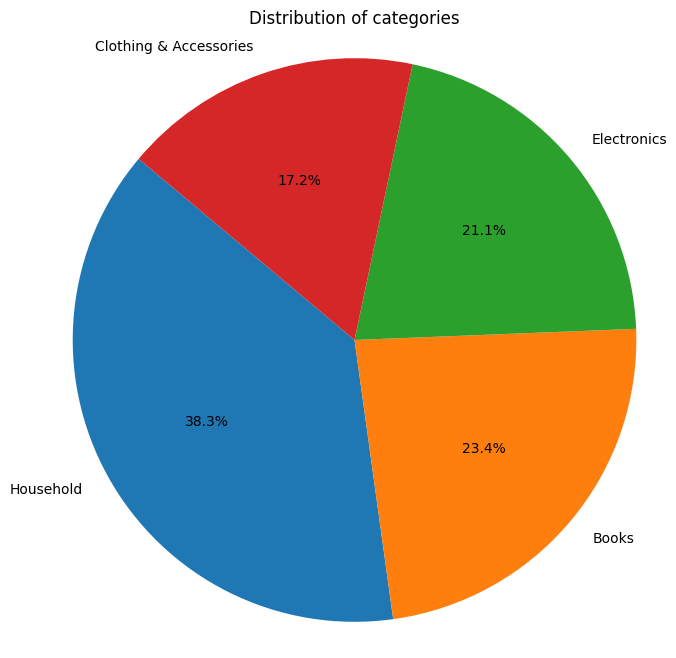

In [11]:
plt.figure(figsize=(8, 8))
label_counts = df['category'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of categories')
plt.axis('equal')  
plt.show()

In [12]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
stemmer = SnowballStemmer("english")
def preprocess_text(text):
    if not isinstance(text, str): 
        return ""  
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word.isalnum()]
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

df['processed_description'] = df['description'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kk061\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kk061\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df

,category,description,label,processed_description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,3,paper plane design frame wall hang motiv offic...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",3,saf frame paint wood inch x inch special effec...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,3,saf textur modern art print frame paint synthe...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",3,saf flower print frame paint synthet inch x in...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,3,incred gift india wooden happi birthday uniqu ...
...,...,...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...,2,strontium microsd class gb memori card black m...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...,2,crossbeat wave waterproof bluetooth wireless e...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,2,karbonn titanium wind w white karbonn titanium...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",2,samsung guru fm plus black colour black compac...


In [14]:
X = df['processed_description']
y = df['label']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [17]:
tokenizer = Tokenizer(num_words=5000)  
tokenizer.fit_on_texts(X_train)

In [18]:
X_train_seq = tokenizer.texts_to_sequences(X_train)   
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [19]:
max_len = 100  
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [20]:
X_test_pad,X_test_pad

(array([[  75,   30,  462, ...,    0,    0,    0],
        [ 156,   92, 1220, ...,    0,    0,    0],
        [ 408,  905,  412, ...,    0,    0,    0],
        ...,
        [  38,  353,  424, ...,    0,    0,    0],
        [ 494, 1294,  261, ...,    0,    0,    0],
        [4265,  605, 1321, ...,    0,    0,    0]]),
 array([[  75,   30,  462, ...,    0,    0,    0],
        [ 156,   92, 1220, ...,    0,    0,    0],
        [ 408,  905,  412, ...,    0,    0,    0],
        ...,
        [  38,  353,  424, ...,    0,    0,    0],
        [ 494, 1294,  261, ...,    0,    0,    0],
        [4265,  605, 1321, ...,    0,    0,    0]]))

In [21]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))   
model.add(GRU(units=128, return_sequences=False))  
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()


c:\Users\kk061\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))


Epoch 1/5
631/631 ━━━━━━━━━━━━━━━━━━━━ 89s 135ms/step - accuracy: 0.5361 - loss: 1.0585 - val_accuracy: 0.9353 - val_loss: 0.2559
Epoch 2/5
631/631 ━━━━━━━━━━━━━━━━━━━━ 106s 168ms/step - accuracy: 0.9492 - loss: 0.2061 - val_accuracy: 0.9661 - val_loss: 0.1396
Epoch 3/5
631/631 ━━━━━━━━━━━━━━━━━━━━ 106s 168ms/step - accuracy: 0.9699 - loss: 0.1179 - val_accuracy: 0.9533 - val_loss: 0.1910
Epoch 4/5
631/631 ━━━━━━━━━━━━━━━━━━━━ 104s 165ms/step - accuracy: 0.9521 - loss: 0.1836 - val_accuracy: 0.9626 - val_loss: 0.1397
Epoch 5/5
631/631 ━━━━━━━━━━━━━━━━━━━━ 99s 157ms/step - accuracy: 0.9786 - loss: 0.0855 - val_accuracy: 0.9703 - val_loss: 0.1160


In [23]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

316/316 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9714 - loss: 0.1113
Accuracy on Test Set: 97.03%


In [24]:
y_pred = np.argmax(model.predict(X_test_pad), axis=-1)  

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

316/316 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2378
           1       0.98      0.98      0.98      1750
           2       0.96      0.96      0.96      2082
           3       0.97      0.97      0.97      3875

    accuracy                           0.97     10085
   macro avg       0.97      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



In [25]:
new_data = ["iVoltaa 3.4A Dual Port Car Charger with Micro USB Cable - Black"]
new_data_seq = tokenizer.texts_to_sequences(new_data)
new_data_pad = pad_sequences(new_data_seq, maxlen=max_len, padding='post', truncating='post')

# Predicting the class for new data
new_predictions = np.argmax(model.predict(new_data_pad), axis=-1)

# Decode the predictions back to category labels
decoded_predictions = label_encoder.inverse_transform(new_predictions)
print(f"Predicted categories for new data: {decoded_predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted categories for new data: ['Electronics']
